In [6]:
import polarization
import matplotlib.pyplot as plt

In [7]:
# Shared configuration for the simulation
num_agents = polarization.NUM_AGENTS
num_bins = polarization.NUM_BINS
max_time = 100

In [8]:
simulation = polarization.run_simulation(
    polarization.build_extreme_beliefs(num_agents),
    polarization.build_inf_graph_2_groups_faint(num_agents, 0.7, 0.2),
    max_time,
    num_bins,
    polarization.Update.CONFBIAS_SHARP,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
)

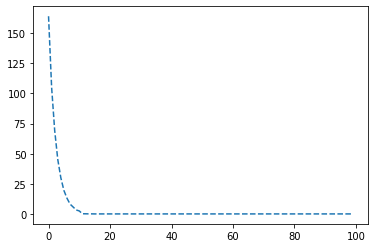

In [9]:
plt.plot(simulation, linestyle="dashed")

In [10]:
simulations = {update_type: polarization.run_simulation(
    polarization.build_extreme_beliefs(num_agents),
    polarization.build_inf_graph_2_groups_faint(num_agents, 0.1, 0.5),
    max_time,
    num_bins,
    update_type,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in polarization.Update}

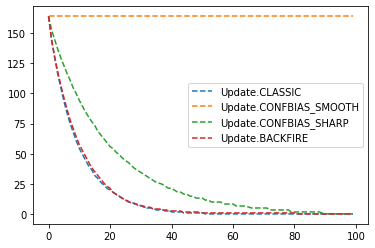

In [11]:
for update_type, values in simulations.items():
    plt.plot(values, linestyle="dashed", label=update_type)
plt.legend()

In [13]:
simulations2 = {update_type: polarization.run_simulation(
    polarization.build_mild_beliefs(num_agents, polarization.LOW_POLE, polarization.HIGH_POLE, polarization.BELIEF_STEP),
    polarization.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    150,
    num_bins,
    update_type,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in polarization.Update}

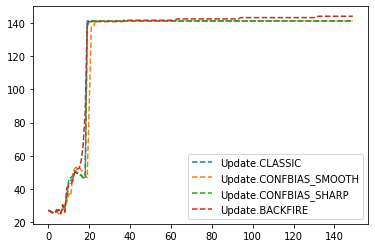

In [14]:
for update_type, values in simulations2.items():
    plt.plot(values, linestyle="dashed", label=update_type)
plt.legend()

In [15]:
sim = polarization.run_simulation(
    polarization.build_mild_beliefs(num_agents, polarization.LOW_POLE, polarization.HIGH_POLE, polarization.BELIEF_STEP),
    polarization.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    400,
    num_bins,
    polarization.Update.BACKFIRE,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
)

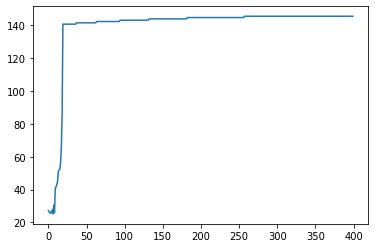

In [16]:
plt.plot(sim)

In [17]:
sim[399]

145.5646755311823

# Run Simulations

The default parameters are defined as constants in the `polarization.py` module.

- NUM_AGENTS = 100
- LOW_POLE = 0.25
- HIGH_POLE = 0.75
- CONSENSUS_VALUE = 0.5


- NUM_BINS = 201
- ALPHA = 1.6
- K = 1000


- CONFBIAS_DISCOUNT = 0.5
- BACKFIRE_BELIEF_THRESHOLD = 0.4
- BACKFIRE_INFLUENCE_THRESHOLD = 0.2


- CLIQUE_BELIEF_VALUE = 0.5


- GROUPS_DISCONNECTED_BELIEF_VALUE = 0.5


- GROUPS_FAINTLY_BELIEF_VALUE_STRONG = 0.5
- GROUPS_FAINTLY_BELIEF_VALUE_WEAK = 0.1


- INFLUENCERS_BALANCED_OUTGOING_BOTH = 0.6
- INFLUENCERS_BALANCED_INCOMING_BOTH = 0.0
- INFLUENCERS_BALANCED_OTHERS = 0.1


- INFLUENCERS_UNBALANCED_OUTGOING_FIRST = 0.8
- INFLUENCERS_UNBALANCED_OUTGOING_SECOND = 0.5
- INFLUENCERS_UNBALANCED_INCOMING_FIRST = 0.1
- INFLUENCERS_UNBALANCED_INCOMING_SECOND = 0.1
- INFLUENCERS_UNBALANCED_OTHERS = 0.2
